In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Definições úteis.

A função abaixo gera amostras de uma função ruidosa criada a partir da seguinte função objetivo (i.e., o mapeamento verdadeiro)
$$y = 2 + x_1 + 0.5 x_1^2$$

In [2]:
# Função que cria o modelo gerador (target function).
def target_function(N, x1, seed):
    # Reset the PN sequence generator.
    np.random.seed(seed)
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*x1**2
    y_noisy = y + np.random.randn(N, 1)
    return y, y_noisy

### Variância

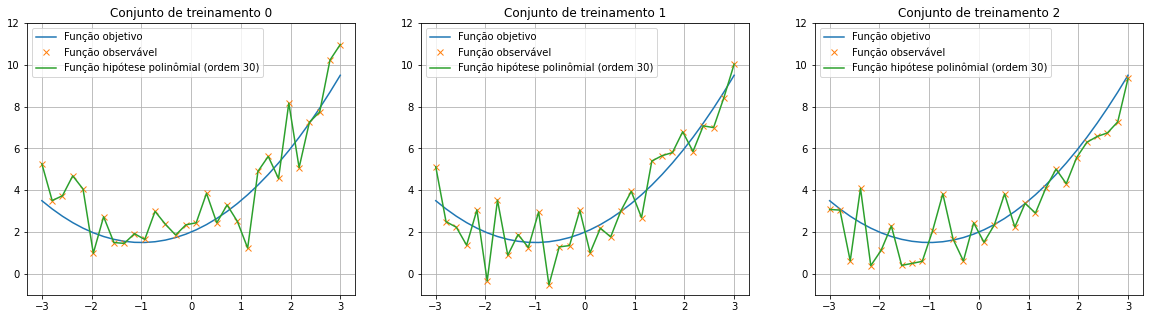

In [3]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure(figsize=(20,5))

for i in range(3):
    
    ax = plt.subplot(1, 3, i+1)
    # Create target function.
    y, y_noisy = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    
    plt.title('Conjunto de treinamento '+str(i))
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, y_noisy, 'x', label='Função observável')
    plt.plot(x1, y_pred, label='Função hipótese polinômial (ordem 30)')
    plt.legend()
    plt.ylim([-1, 12])
    plt.grid()

+ Percebam que a função hipótese **varia** com o conjunto de treinamento.

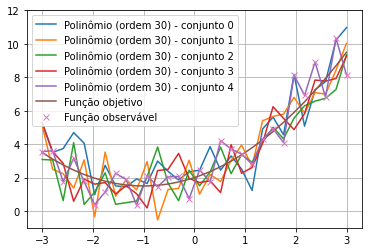

In [4]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure()

for i in range(5):
    
    # Create target function.
    y, y_noisy = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    plt.plot(x1, y_pred, label='Polinômio (ordem 30) - conjunto '+str(i))
    
plt.plot(x1, y, label='Função objetivo')
plt.plot(x1, y_noisy, 'x', label='Função observável')

plt.legend()
plt.ylim([-1, 12])
plt.grid()

+ As funções hipóteses se ajustam muito bem aos diferentes conjuntos de treinamento.

+ No entanto, se considerarmos a esperança sobre os diferentes conjuntos de treinamento, a média das hipóteses se ajustaria perfeitamente à função verdadeira (dado que o ruído é centrado em 0). 

+ Como podemos ver, a variância é muito alta, pois na média, uma predição difere muito do valor da média das predições.

$$\text{var} = E[(E[\hat{y}] - \hat{y})^2]$$

### Viés

MSE 2.2992708290401893
MSE 2.055912019990623
MSE 2.161761103763039
MSE 2.075465298178955
MSE 2.078724934457149


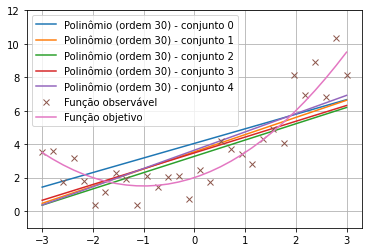

In [5]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure()

for i in range(5):

    # Create target function.
    y, y_noisy = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=1, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)

    y_pred = reg.predict(x1)
    mse = mean_squared_error(y_pred, y)
    print('MSE', mse)

    plt.plot(x1, y_pred, label='Polinômio (ordem 30) - conjunto '+str(i))
    
    
plt.plot(x1, y_noisy, 'x', label='Função observável')
plt.plot(x1, y, label='Função objetivo')    
plt.legend()
plt.ylim([-1, 12])
plt.grid()

plt.show()

+ Nenhuma das funções hipótese se aproxima bem da função verdadeira, exceto em dois pontos (em torno de x=-2 e x=1.8).

+ O viés é alto porque a diferença entre o valor verdadeiro e a média do valor predito é grande.
    + Aqui, média significa **esperança ao longo de diferentes conjuntos de treinamento** e não **esperança sobre exemplos de um dado conjunto de treinamento**.

$$\text{Viés} = E[\hat{y}] - y$$

+ Portanto, não importa quão bem ajustado aos dados o modelo esteja (i.e., conjunto infinito de amostras), ele nunca irá capturar a curvatura da função objetivo.

### Referências

[1] 'bias_variance_decomp: Bias-variance decomposition for classification and regression losses', http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

[2] 'The Bias-Variance Tradeoff in Statistical Machine Learning - The Regression Setting', https://www.quantstart.com/articles/The-Bias-Variance-Tradeoff-in-Statistical-Machine-Learning-The-Regression-Setting/

[3] 'Sketch of bias, variance, training, test and Bayes errors', https://botlnec.github.io/islp/sols/chapter2/exercise3/